In [1]:
%matplotlib inline

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 06. Regression Models
### Taking our first steps to modelling data
Topics:
* Regression: definition, problem statement;
* Linear regression. Ordinary Least Squares;
* Multiple linear regression;
* Logistic regression: problem statement;
* Logistic regression application.

In [3]:
print("Python is working...")

Python is working...


* Problem Overview
    * Regression, classification
    * Machine learning: putting it all together
* Linear regression
    * Motivation, derivation, usage
    * More involved example
* Logistic regression
    * Motivation, usage

### Data Modelling
* As part of the data science process, we want to get a clear idea of what processes generate our data
    * **Scientific method**: Form a hypothesis and test it
    * Extension: Find a way to understand what's in the data
        * We already did this a lot of times: "mental models" captured our ideas
* A stricter way of modelling
    * Treat the data generating process as a function
        * "Black box"
    * Make some assumptions
    * Create a simplified version of reality under your assumptions
    * Check your model against reality
        * => Create better and more complex models
<img src="images/blackbox.png" />

We could make assumptions based on results. For example, if we know that in 2022 in Bulgaria arrived 300000 tourists, then we could assume, that under the same conditions, the same count of tourists will arrive again. As we could se, we have a method, which we could not see (`the black box`). This way, we could do **controlled experiments**. This means, that we could only change the input to get different output.

If we get different sets of outputs with similar inputs, we will see that the bigger the sets are, the more elements we would be able to see present in the two sets. This means, that with more data, we could cover more edge cases and common cases. `A = B` and `B = C`, so `A = C`

Let's say, that the input is a matrix $ X_{nxm}$, which goes trough the black box and produces an output $ Y_{nx1} $. So we want to create a function $ f(x) $, which takes the input and produces output $ \tilde{Y}_{nx1} $, which is simillar to the output from the black box.

### A Quick Peek at Machine Learning
* Machine learning is "making computers learn with experiance, without being explicitly programmed"
    * Similar to how humans learn
* It's all about models
    * ML follows the same processes as we're going to do
    * ML algorithms are basically "function approximations"
        * Each algorithm does its own thing, i.e., has different assumptions, scope and performance
* It's also about selecting the best model
    * There are many "helper algorithms" to do so - either fully automated or semi-automated
        * Visualization algorithms,
        * Fine-tuning algorithms,
        * Model selection algorithms, etc.

We want to create a function, that in the begining knows nothing, and in the end knows something. This is the most general way to say it.

Keep in mind, though, that the model knows only what it learns (or what you give it to learn). For example, model, that only knows how to calculate distances in Smolyan in not likely to know how to multiply matrices :D

**model is an aproximation of the reality.** It only gets what it needs, and based on some metrics it tries to it's job in the best possible way. 

## Linear Regression
### Predicy continuous values... and torture first-semester students

### Linear Regression Intuition
* Regression - predicting a continuous variable
* Problem statement
    * Given pairs of `$ (x;y) $` points, create a model
        * Under the assumption that $ y $ depends linaerly on $ x $ *(and nothing else)*
* Linear regression model
    * $ y = ax + b $
        * $ a, b $ - unknown parameters
        * Example: $ y = 2x + 3 $
    * Real case: we have many sources of error
        * So, the relationship we observe, cannot be perfect
        * There is some noise added to our data
            * $ y = ax + b + \epsilon, \epsilon $ - noise
        * We **don't want** to model the noise, only the "useful function"

Regression does not come from regress, like un-progressing. It's `regressing to the mean`.

We have X and Y, we need to find the optimal values for A and B

To explain in general, based on some results, we may predict the Y value of a new point, based on the X variable.
<img src="images/lin.png" />

Now let's sample our data and recreate a linear regression.

In [4]:
num_points = 1000
x = np.linspace(-3, 5, num_points)


In [5]:
x

array([-3.00000000e+00, -2.99199199e+00, -2.98398398e+00, -2.97597598e+00,
       -2.96796797e+00, -2.95995996e+00, -2.95195195e+00, -2.94394394e+00,
       -2.93593594e+00, -2.92792793e+00, -2.91991992e+00, -2.91191191e+00,
       -2.90390390e+00, -2.89589590e+00, -2.88788789e+00, -2.87987988e+00,
       -2.87187187e+00, -2.86386386e+00, -2.85585586e+00, -2.84784785e+00,
       -2.83983984e+00, -2.83183183e+00, -2.82382382e+00, -2.81581582e+00,
       -2.80780781e+00, -2.79979980e+00, -2.79179179e+00, -2.78378378e+00,
       -2.77577578e+00, -2.76776777e+00, -2.75975976e+00, -2.75175175e+00,
       -2.74374374e+00, -2.73573574e+00, -2.72772773e+00, -2.71971972e+00,
       -2.71171171e+00, -2.70370370e+00, -2.69569570e+00, -2.68768769e+00,
       -2.67967968e+00, -2.67167167e+00, -2.66366366e+00, -2.65565566e+00,
       -2.64764765e+00, -2.63963964e+00, -2.63163163e+00, -2.62362362e+00,
       -2.61561562e+00, -2.60760761e+00, -2.59959960e+00, -2.59159159e+00,
       -2.58358358e+00, -

In [6]:
y = 2 * x + 3

In [7]:
x, y

(array([-3.00000000e+00, -2.99199199e+00, -2.98398398e+00, -2.97597598e+00,
        -2.96796797e+00, -2.95995996e+00, -2.95195195e+00, -2.94394394e+00,
        -2.93593594e+00, -2.92792793e+00, -2.91991992e+00, -2.91191191e+00,
        -2.90390390e+00, -2.89589590e+00, -2.88788789e+00, -2.87987988e+00,
        -2.87187187e+00, -2.86386386e+00, -2.85585586e+00, -2.84784785e+00,
        -2.83983984e+00, -2.83183183e+00, -2.82382382e+00, -2.81581582e+00,
        -2.80780781e+00, -2.79979980e+00, -2.79179179e+00, -2.78378378e+00,
        -2.77577578e+00, -2.76776777e+00, -2.75975976e+00, -2.75175175e+00,
        -2.74374374e+00, -2.73573574e+00, -2.72772773e+00, -2.71971972e+00,
        -2.71171171e+00, -2.70370370e+00, -2.69569570e+00, -2.68768769e+00,
        -2.67967968e+00, -2.67167167e+00, -2.66366366e+00, -2.65565566e+00,
        -2.64764765e+00, -2.63963964e+00, -2.63163163e+00, -2.62362362e+00,
        -2.61561562e+00, -2.60760761e+00, -2.59959960e+00, -2.59159159e+00,
        -2.5

In [8]:
y_noise = np.random.normal(loc = 0, scale = 1, size = num_points)
y += y_noise

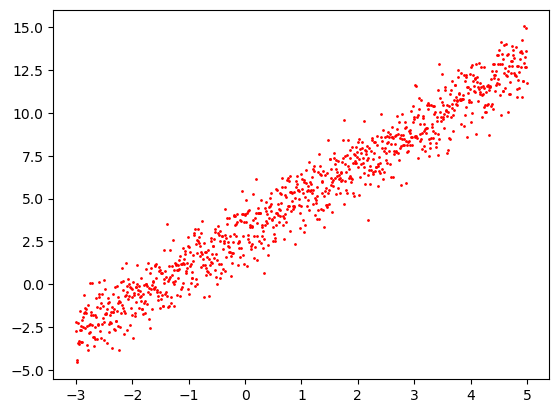

In [9]:
plt.scatter(x, y, c = "r", s = 1)
plt.show()

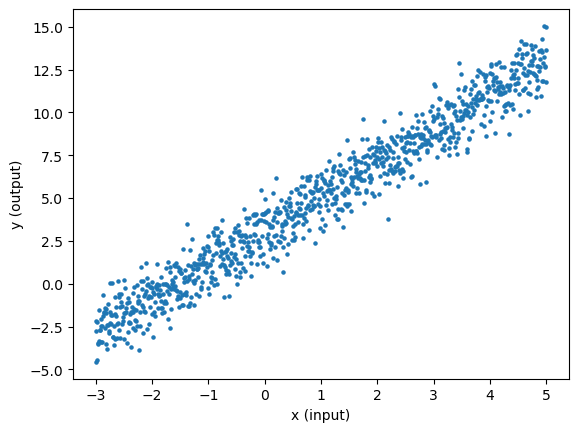

In [10]:
plt.scatter(x, y, s = 5)
plt.xlabel("x (input)")
plt.ylabel("y (output)")

plt.show()

In [11]:
y += np.abs(x)

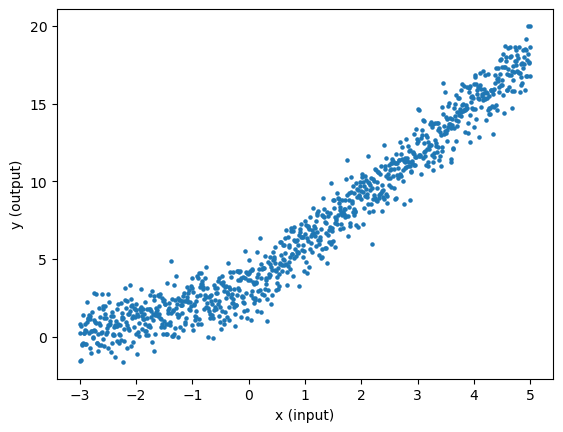

In [12]:
plt.scatter(x, y, s = 5)
plt.xlabel("x (input)")
plt.ylabel("y (output)")

plt.show()

In [13]:
num_points = 500
x = np.linspace(-3, 5, num_points)
y = 2 * x + 3
y_noise = np.random.normal(loc = 0, scale = 2, size = num_points)

y += y_noise * np.abs(x)

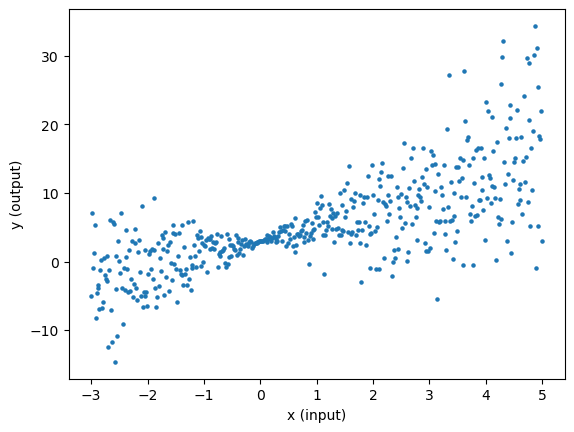

In [14]:
plt.scatter(x, y, s = 5)
plt.xlabel("x (input)")
plt.ylabel("y (output)")

plt.show()

As we can see, the noise depends on the data. Check `heteroskedasticity`.

From what we have seen now (it is valid for every ML algorithm), we have a funciton, which depends on the data, and a noise, **which does not** depend on the data.
$$ y = f(x) + \epsilon $$

In [15]:
data = pd.DataFrame({"x": x, "y": y})
data = data.sample(len(data))
data.to_csv("data.csv", index = None)

In [16]:
data = pd.read_csv("data.csv")

In [17]:
data

,x,y
0,0.206413,3.430999
1,2.066132,5.033811
2,-2.086172,-6.625123
3,0.174349,3.615173
4,1.184369,5.811527
...,...,...
495,0.911824,5.657518
496,-1.044088,3.568279
497,-1.989980,-1.817108
498,0.222445,4.376332


So we have this data, that we exported earlier. Now we want to model it in some way, that is useful to us.

In [18]:
x = data.x.values
y = data.y.values

In [19]:
a = 5
b = 3

In [20]:
y_model = a * x + b

In [21]:
y_model

array([ 4.03206413e+00,  1.33306613e+01, -7.43086172e+00,  3.87174349e+00,
        8.92184369e+00,  6.27655311e+00,  5.63527054e+00,  1.70981964e+01,
        6.83767535e+00,  2.49539078e+01, -6.70941884e+00,  3.31062124e+00,
        2.02244489e+01,  6.59719439e+00,  1.63767535e+01,  1.61362725e+01,
       -1.16793587e+01,  1.14068136e+01, -9.75551102e+00, -1.81963928e+00,
        1.62164329e+01,  1.99038076e+01,  1.86212425e+01,  1.89418838e+01,
       -7.19038076e+00, -9.03406814e+00,  2.09458918e+01,  2.23887776e+01,
        2.53547094e+01, -2.94188377e+00,  7.87975952e+00,  2.64769539e+01,
        1.10861723e+01, -6.38877756e+00,  1.85410822e+01, -6.06813627e+00,
        2.31102204e+01,  9.72344689e+00, -3.10220441e+00, -8.63326653e+00,
       -3.42284569e+00,  7.95991984e+00, -1.15190381e+01,  2.06252505e+01,
       -6.78957916e+00, -5.50701403e+00,  1.34108216e+01,  1.30661323e+00,
        1.25290581e+01,  2.12665331e+01,  6.11623246e+00, -6.14829659e+00,
       -5.66733467e+00,  

In [35]:
def plot_model(x, y, a, b):
    y_model = a * x + b
    plt.scatter(x, y)
    plt.plot(x, y_model, c = "r", label = f"y = {a}x+{b}")
    
    plt.xlabel("x (input)")
    plt.ylabel("y (output)")
    
    plt.legend()
    
    plt.show()

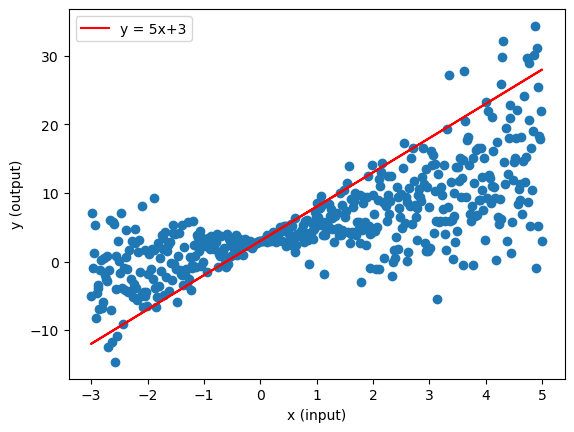

In [36]:
plot_model(x, y, 5, 3)

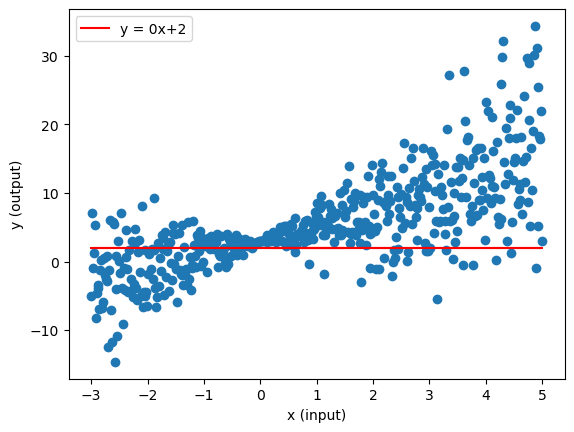

In [37]:
plot_model(x, y, 0, 2)

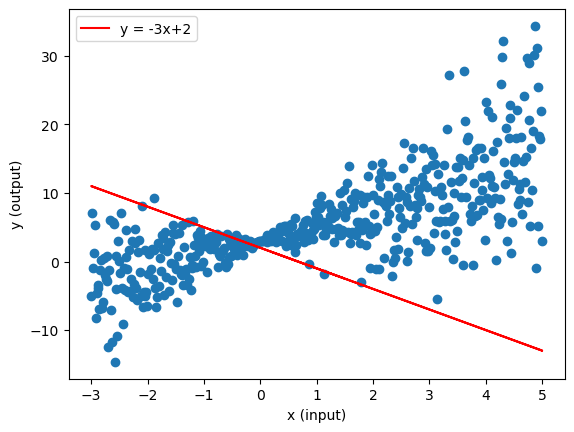

In [38]:
plot_model(x, y, -3, 2)

### Distances
* By definition, the distance from a point $ A $ to the line $ l $ is measured on the perpendicular from $ A $ to $ l $
    * Red dashed lines
    * This is correct, but very computationally expensive
* Another approach: consider vertical distances
    * Gray solid lines
    * Equivalent measures (for our purposes)
        * You can prove it to yourself
<img src="images/expl.png" />

We calculate the distance using the vertical lines, because if we use the red lines one, we should first find the equation, that represents the line, and after that calculate the result based on the two points. But if we use the vertical lines, the distance is $ | y- \tilde{y} | $, because the first point is at $ (x_{a};y_{a}) $, and the second point is at $ (x_{a};\tilde{y}_{a})$

* Look at a point and its projection
    * $ x $-coordinate: the same 
    * $ y $-coordinate
        * Point: we know it from the start
        * Projection: we can calculate it
* Calculating the projection $ \tilde{y} $
    * It's whatever the model function produces for $ x $
    * $ \tilde{y} = ax + b $
* Distances becomes a very simple difference
    * $ d = y - \tilde{y} $
        * But... now distances can be negative
* To make distances positive, we can do a lot of things
* Simplest: take the absolute value
    * This is used sometimes
        * Mean absolute error, MAE
    * Although it works quite well, there are a few problems with it
    * E.g, $ d = 0 $ ath the "perfect" line
* Better: square the distance
    * It's also non-negative everywhere but...
        * Is almost always > 0
        * Emphasizes bigger errors more (can be good or bad)
    * This is called mean square error, MSE
* New definition of distance
    * $ d = (y - \tilde{y})^2 $

### Cost Function
* We want to somehow account for all points
    * We can simply sum all distances to get a measure of "the total distance" from all points to the line
    * Since we can have 4, 10, 100, or $10^9$ points, we also need to normalize the error
* The sum of distances now becomes
    * $ J = \frac{1}{n} \sum_{i=1}^{n}(y_{i} - \tilde{y}_{i})^2 $
    * This is what we call our **total cost function**
        * Beware of **confusing terms**: $ d $ is usually called a "loss function", while $ J $ is the "(total) cost function"
    * This is an estimation of the total distance
    * **Minimizing this function will produce the best line**

In [39]:
#def mse(observed, estimated):
def mse(y, y_model):
    return ((y - y_model) ** 2).mean()

In [44]:
def plot_model(x, y, a, b):
    y_model = a * x + b
    
    model_mse = mse(y, y_model)
    
    plt.scatter(x, y)
    plt.plot(x, y_model, c = "r", label = f"y = {a}x+{b}, mse: {model_mse}")
    
    plt.xlabel("x (input)")
    plt.ylabel("y (output)")
    
    plt.legend()
    
    plt.show()

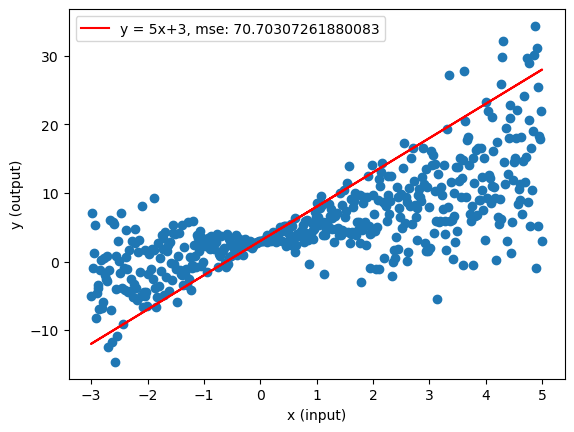

In [45]:
plot_model(x, y, 5, 3)

In [46]:
n_trials = 100
random_a = np.random.uniform(-5, 5, n_trials)
random_b = np.random.uniform(-5, 5, n_trials)

In [60]:
min_mse, best_a, best_b = 1e50, 0, 0
for current_a in random_a:
    for current_b in random_b:
        print(current_a, current_b)
        y_model = current_a * x + current_b
        current_mse = mse(y, y_model)
        if current_mse < min_mse:
            best_a = current_a
            best_b = current_b
            min_mse = current_mse
min_mse

-4.928814121079656 -1.151214076505144
-4.928814121079656 -0.3857139839973609
-4.928814121079656 -3.1719169107108334
-4.928814121079656 2.9371750472366216
-4.928814121079656 0.31048790681948635
-4.928814121079656 -0.5785429485135198
-4.928814121079656 -2.2463024139795507
-4.928814121079656 -0.6150231258092358
-4.928814121079656 -1.7912732249352228
-4.928814121079656 2.0347675094338307
-4.928814121079656 3.8859785871470685
-4.928814121079656 3.803652530024751
-4.928814121079656 3.5083651258412676
-4.928814121079656 1.4130819924470934
-4.928814121079656 3.8320141200877806
-4.928814121079656 2.8112176183450446
-4.928814121079656 0.71830418809453
-4.928814121079656 -3.790941616116955
-4.928814121079656 -3.5931778346686327
-4.928814121079656 -2.2713436089119146
-4.928814121079656 -2.676783424026743
-4.928814121079656 -0.8076154761162471
-4.928814121079656 -0.4608675828504447
-4.928814121079656 2.411156103792135
-4.928814121079656 -0.3470436656674334
-4.928814121079656 1.0505746428006475
-4.9

23.34268943040605

In [61]:
best_a, best_b

(2.162964259101611, 3.5083651258412676)

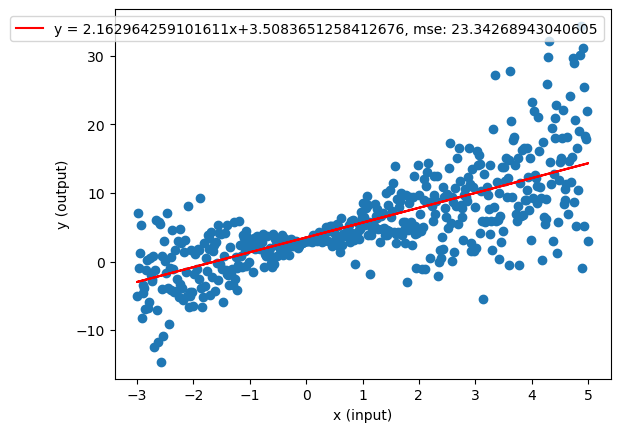

In [62]:
plot_model(x, y, best_a, best_b)

### Inspecting the Cost Function
* Note that $ J $ does not depend on $ x $ and $ y $
    * $ x $ and $ y $ are already fixed - we don't touch the data at all when we try to model it
    * $ J $ depends only on the line parameters $ (a;b) $
        * in math jargon, $ J $ is a function of $a $ and $ b $: $ J = f(a;b) $
* Also note the form of $J$: It's $ (...)^2 $
    * This is a paraboloid (3D parabola)
    * See how varying $ a $ and $ b $ gives us a different output number for $ J $
    * It has exactly one min value
        * And we can see it
    * Our task: find the parameters $ a, b $, which make $ J $ as small as possible.

### Minimizing the Cost Function
* Intuition
    * If the plot was a real object (say, a sheet of some sort), we could slide a ball bearing on it
    * After a while, the ball bearing will settle at the "bottom" due to gravity
    * We could measure the position of the ball and that's it :)
* More "nerd speak"
    * This is the same task - we have a gravity potential energy that the ball tries to maximize
        * When it's minimal, the ball remains in stable equilibrium
<img src="images/paraboloid.png">

Which function will make the ball run to the lowest point of the sheet? 
* Turns out, we can also do this using calculus
    * In many dimensions
* We can find the optimal parameters right away
     * Because the function is really simple
     * But we'll stick to another approach because this is what is useful for all other ML tasks
* We'll try to replicate the example with the ball
    * Basically, we'll try to slide (descend) over the function surface until we reach the minimum
    * This method is called **gradient descent**

### Gradient Descent
* We know what **descent** is
    * How about **gradient**?
* Whe gradient (let's call it $ g $ for now) is a vector function
    * Like $ J, g $ accepts two values $ a $ and $ b $
    * $ g $ returns a vector which shows where **the steepest ascent** is
    * $ g $ is all arrows on the picture
    * Interpretation
        * The length of the vector tells us how steep the maximum is
            * Long vector = very, very steep;
            * Short vector = relatively flat;
        * The direction of the vector tells us where to go in order to get there.
* Gradients will alsmost work
    * Except they show us the highest point, and we're looking for the lowest one
    * Solution: just take the negative gradient $ -g $
    * Ascending on $ -g $ is the same as descending on $ g $
* This is good now, but how is the gradient defined?
    * We saw from the picture that it's related to a function
    * The gradient of a function $ f(a,b) $ is a vector $ g(a,b) $ with the following components
    * $ g_{a} = \frac{\delta J}{\delta a}, g_{b} = \frac{\delta J}{\delta b} $
    * The $ \delta $ symbol means "partial derivative"
        * If you don't understand this, you only need to know that partial derivatives are quite easy to calculate.
* Remember that $ J = \frac{1}{n}\sum(y_{i}-\tilde{y_{i}})^2 $
    * We can prove that
    * $ \frac{\delta J}{\delta a} = -\frac{2}{n}\sum x_{i} (y_{i} - \tilde{y_{i}}); \frac{\delta J}{\delta b} = -\frac{2}{n} \sum (y_{i} - \tilde{y_{i}}) $
* This can be implemented easily
    * Note how this code makes use of numpy and its extremely easy operations on arrays (check the code bellow)
* Now, if we know $ x, y, a, b $ we can calculate the gradient vector
    * You'll also see the gradient of $ J $ being denoted as $ \nabla J $
        * This is simply math notation
* Let's now get to the real descent
* Iterative alforithm - perform as long as needed
    * Start from some point in the $ (a;b) $ space: $ (a_{0};b_{0}) $
    * Decide how big steps to take: number $ a $
        * Called "learning rate" in ML terminology
    * Use the current $ a, b $ and $ x, y $ to compute $ \nabla J $
        * $ - \nabla J_{a} $ tells us how much to move in the $ a $ direction in order to get the minimum
        * Similar for $ - \nabla J_{b} $
    * Take a step with size $ a $ in each direction
        * $ a_{1} = a_{0} - \nabla J_{a}; b_{1} = b_{0} - \nabla J_{b} $
        * $ (a_{1};b_{1}) $ are the new coordinates
    * Repeat the two preceding steps as needed
        * Usually, we do this for a fixed number of iterations
        
<img src="images/gd.png" />

In [63]:
a, b = 5, 18
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(x) * np.sum(y - (a * x + b))

In [64]:
[a_gradient, b_gradient]

[64.69839925464, 35.03314358913288]

In [66]:
# as we can see, the steps we are taking are way too small
a - a_gradient

-59.698399254639995

In [67]:
# This is why we will use the alpha variable
alpha = 0.001
a - alpha * a_gradient

4.93530160074536

See, now we are taking some serious steps :) Now a from `5` became `4.94`. Same thing applies for b.

In [68]:
b - alpha * b_gradient

17.964966856410868

The bigger the alpha is, the bigger steps we will take

In [69]:
# Let's make a model and try to calculate the mse between the two
y_tilde = a * x + b
mse(y, y_tilde)

371.2002264557938

In [70]:
new_a = a - alpha * a_gradient
new_b = b - alpha * b_gradient

In [71]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

365.81938300699164

This way we are making steps to a better model. :)

In [72]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha * b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

360.50326069228396

In [73]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha * b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

355.25185951167106

If we have MSE, we can get the RMSE (Root Min Square Error) when we get the square root of the mse.
`np.sqrt(error)`

This is all cool and everything, but it seems quite hard. That's why somebody already made it in a module, which we could just import :)

In [75]:
linear_regression = LinearRegression()

In [76]:
linear_regression.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.06412826e-01  2.06613226e+00 -2.08617234e+00  1.74348697e-01
  1.18436874e+00  6.55310621e-01  5.27054108e-01  2.81963928e+00
  7.67535070e-01  4.39078156e+00 -1.94188377e+00  6.21242485e-02
  3.44488978e+00  7.19438878e-01  2.67535070e+00  2.62725451e+00
 -2.93587174e+00  1.68136273e+00 -2.55110220e+00 -9.63927856e-01
  2.64328657e+00  3.38076152e+00  3.12424850e+00  3.18837675e+00
 -2.03807615e+00 -2.40681363e+00  3.58917836e+00  3.87775551e+00
  4.47094188e+00 -1.18837675e+00  9.75951904e-01  4.69539078e+00
  1.61723447e+00 -1.87775551e+00  3.10821643e+00 -1.81362725e+00
  4.02204409e+00  1.34468938e+00 -1.22044088e+00 -2.32665331e+00
 -1.28456914e+00  9.91983968e-01 -2.90380762e+00  3.52505010e+00
 -1.95791583e+00 -1.70140281e+00  2.08216433e+00 -3.38677355e-01
  1.90581162e+00  3.65330661e+00  6.23246493e-01 -1.82965932e+00
 -1.73346693e+00  8.31663327e-01 -4.66933868e-01  3.66733467e-01
  4.79158317e+00  4.13426854e+00  2.53106212e+00 -7.71543086e-01
  1.76152305e+00 -1.86172345e+00  3.22044088e+00 -1.06012024e+00
  3.86172345e+00 -2.26252505e+00 -1.58917836e+00  2.54709419e+00
  4.66332665e+00  3.82965932e+00 -8.83767535e-01  3.46092184e+00
  4.61523046e+00  4.11823647e+00  3.34669339e-01 -5.47094188e-01
 -8.19639279e-01 -4.18837675e-01  6.07214429e-01  1.40280561e-02
 -1.62324649e-01  2.75551102e+00  2.57915832e+00  2.88376754e+00
 -2.10420842e-01  4.75951904e+00  3.39679359e+00  2.27454910e+00
  3.55711423e+00  2.17835671e+00  5.75150301e-01  3.00601202e-02
  2.72344689e+00 -2.88777555e+00 -1.68537074e+00 -5.95190381e-01
  4.77555110e+00 -1.57314629e+00 -2.35871743e+00 -7.39478958e-01
 -2.77555110e+00  4.31062124e+00 -1.97394790e+00  3.04408818e+00
  4.98396794e+00  5.43086172e-01  2.96392786e+00  3.42885772e+00
  2.03406814e+00  1.69739479e+00  2.00200401e+00 -8.21643287e-02
 -2.72745491e+00  1.15230461e+00 -6.11222445e-01 -2.27855711e+00
  3.02805611e+00  4.26252505e+00  4.95190381e+00 -8.35671343e-01
  2.29058116e+00  3.62124248e+00  1.58316633e-01  3.57314629e+00
  1.36072144e+00 -1.34869739e+00  3.30060120e+00  2.77154309e+00
  3.36472946e+00  1.12024048e+00  4.87174349e+00 -1.31663327e+00
 -2.98396794e+00  3.34869739e+00  2.94789579e+00 -1.71743487e+00
 -2.59919840e+00 -1.12424850e+00  4.64729459e+00  2.24248497e+00
 -2.00601202e+00  4.27855711e+00 -2.53507014e+00  3.89378758e+00
  4.71142285e+00 -2.95190381e+00 -1.30260521e-01 -8.67735471e-01
 -7.55511022e-01 -2.64729459e+00  4.48697395e+00  4.23046092e+00
  3.92585170e+00  1.07214429e+00 -2.61523046e+00 -6.43286573e-01
  3.02605210e-01 -2.96793587e+00  3.70140281e+00  4.59919840e+00
  3.63727455e+00  2.51503006e+00  1.26252505e-01 -3.40681363e-02
 -9.47895792e-01  2.78757515e+00  3.60521042e+00 -2.05410822e+00
 -1.39679359e+00 -2.15030060e+00  2.38677355e+00  3.26853707e+00
  1.40881764e+00  8.63727455e-01 -1.76553106e+00 -1.55711423e+00
  3.31663327e+00  4.63126253e+00  1.87374749e+00  4.72745491e+00
 -2.51903808e+00 -1.62124248e+00  8.47695391e-01  1.58517034e+00
  2.65931864e+00 -2.42284569e+00  1.20040080e+00 -5.15030060e-01
  7.03406814e-01  1.85771543e+00  3.20440882e+00  9.27855711e-01
  1.52104208e+00  4.62925852e-01  4.80761523e+00  3.47695391e+00
  3.33266533e+00 -1.23647295e+00  2.49899800e+00  1.45691383e+00
 -2.69539078e+00 -4.98997996e-01  4.05410822e+00 -1.42885772e+00
  3.71743487e+00 -2.67935872e+00  1.79358717e+00 -8.51703407e-01
 -2.21442886e+00  4.90380762e+00  3.15631263e+00  4.96793587e+00
 -2.56713427e+00  2.70741483e+00  3.18637275e-01 -1.44488978e+00
  3.25250501e+00  2.41883768e+00 -1.52505010e+00  2.46693387e+00
 -2.87174349e+00  4.74348697e+00  3.98997996e+00 -1.78356713e-01
  1.63326653e+00 -8.03607214e-01  1.48897796e+00  2.56312625e+00
 -1.90981964e+00 -6.61322645e-02  3.41282565e+00  3.78156313e+00
  1.31262525e+00  3.28456914e+00  4.85571142e+00  1.53707415e+00
  3.50701403e-01 -2.50300601e+00 -2.16633267e+00  2.32264529e+00
  3.84569138e+00  1.24849699e+00  4.03807615e+00 -1.92585170e+00
  2.19438878e+00 -1.66933868e+00 -1.50901804e+00 -1.41282565e+00
 -1.63727455e+00  3.66933868e+00  3.07615230e+00  4.16633267e+00
  4.60921844e-02  2.59519038e+00  2.38476954e-01  3.49298597e+00
 -7.07414830e-01 -3.22645291e-01  2.73947896e+00  1.92184369e+00
  1.71342685e+00 -2.45490982e+00  6.39278557e-01  1.16833667e+00
  2.45090180e+00 -1.09218437e+00  2.97995992e+00  2.21042084e+00
  1.29659319e+00 -2.71142285e+00 -1.20440882e+00 -9.15831663e-01
  1.13627255e+00  3.09218437e+00  3.14028056e+00  1.80961924e+00
  2.30661323e+00  4.18236473e+00 -2.11823647e+00 -1.15631263e+00
  2.11422846e+00  1.10220441e-01 -1.74949900e+00  9.59919840e-01
  3.74949900e+00 -3.70741483e-01 -1.14228457e-01  3.50901804e+00
 -1.80360721e-02 -1.17234469e+00  2.70541082e-01 -4.34869739e-01
  6.71342685e-01 -1.89378758e+00 -7.87575150e-01 -2.31062124e+00
 -1.79759519e+00 -4.02805611e-01  5.59118236e-01  4.67935872e+00
 -2.10220441e+00  4.82364729e+00 -1.36472946e+00 -1.02805611e+00
  1.60120240e+00 -2.90581162e-01 -2.37474950e+00  1.37675351e+00
 -1.33266533e+00  4.19839679e+00 -2.18236473e+00  1.77755511e+00
  3.73346693e+00  2.16232465e+00 -2.34268537e+00 -2.00400802e-03
 -2.80761523e+00  2.43486974e+00  8.15631263e-01 -3.86773547e-01
 -5.79158317e-01 -2.58316633e+00 -1.01202405e+00  4.08617234e+00
  2.22645291e+00  4.88777555e+00  2.54509018e-01  3.68537074e+00
 -9.81963928e-02  2.01803607e+00  3.23647295e+00  4.93587174e+00
 -2.13426854e+00  5.00000000e+00  4.10220441e+00 -6.75350701e-01
 -2.75951904e+00  1.21643287e+00  8.95791583e-01  4.21442886e+00
 -2.82364729e+00  4.51903808e+00  7.99599198e-01  4.29458918e+00
  4.45490982e+00  3.79759519e+00  4.91983968e+00 -6.59318637e-01
  4.55110220e+00 -1.07615230e+00 -5.63126253e-01  6.87374749e-01
 -1.25250501e+00  3.97394790e+00  1.88977956e+00 -1.94388778e-01
  1.66533066e+00  3.54108216e+00  2.85170341e+00  1.44088176e+00
  1.82565130e+00  1.28056112e+00 -4.82965932e-01  1.02404810e+00
 -1.60521042e+00  1.00801603e+00 -6.91382766e-01  2.14629259e+00
  4.00601202e+00 -2.74348697e+00  2.40280561e+00  7.35470942e-01
  2.69138277e+00 -2.26452906e-01  2.61122244e+00 -1.14028056e+00
 -2.07014028e+00 -3.54709419e-01  8.79759519e-01  4.15030060e+00
  4.94989980e-01  3.06012024e+00  2.09819639e+00 -1.47695391e+00
 -1.46292585e-01 -1.46092184e+00  2.13026052e+00  2.37074148e+00
 -9.79959920e-01  4.43887776e+00 -2.85571142e+00  1.98597194e+00
 -3.00000000e+00  4.14829659e-01 -1.84569138e+00 -2.58517034e-01
  3.01202405e+00  1.95390782e+00 -2.19839679e+00 -2.74549098e-01
  1.42484970e+00 -2.23046092e+00  1.93787575e+00 -5.31062124e-01
  1.04008016e+00 -2.02204409e+00  1.84168337e+00  4.32665331e+00
  7.83567134e-01  1.56913828e+00  4.42284569e+00  4.78957916e-01
  4.83967936e+00  4.35871743e+00  2.99599198e+00  1.05611222e+00
 -3.06613226e-01  4.34268537e+00 -1.10821643e+00  3.82765531e-01
  9.43887776e-01  4.46893788e-01  7.51503006e-01  2.86773547e+00
 -9.31863727e-01 -8.99799599e-01 -2.63126253e+00  1.74549098e+00
 -2.24649299e+00  4.56713427e+00 -1.65330661e+00  4.50300601e+00
 -1.54108216e+00  2.93186373e+00  2.48296593e+00  1.23246493e+00
 -1.30060120e+00  5.11022044e-01  3.81362725e+00 -1.78156313e+00
 -2.48697395e+00 -9.95991984e-01  2.05010020e+00  1.50501002e+00
 -2.83967936e+00  1.55310621e+00 -1.38076152e+00  4.30861723e-01
 -2.91983968e+00  1.08817635e+00  7.81563126e-02 -1.49298597e+00
  2.83567134e+00  3.94188377e+00 -1.26853707e+00 -2.42484970e-01
  4.24649299e+00  4.53507014e+00  3.98797595e-01  3.90981964e+00
 -2.47094188e+00  1.26452906e+00 -2.43887776e+00  1.42284569e-01
 -2.29458918e+00  5.91182365e-01  2.86573146e-01  1.39278557e+00
 -7.23446894e-01  4.58316633e+00 -5.01002004e-02 -2.79158317e+00
  2.80360721e+00  2.25851703e+00  2.35470942e+00  3.17234469e+00
  1.64929860e+00  2.89979960e+00  4.07014028e+00  2.91583166e+00
 -2.39078156e+00  1.72945892e+00  4.40681363e+00 -2.66332665e+00
  1.96993988e+00 -6.27254509e-01 -4.50901804e-01  3.76553106e+00
  2.33867735e+00  1.90380762e-01  1.32865731e+00  1.10420842e+00
  3.95791583e+00  4.37474950e+00  9.41883768e-02  9.11823647e-01
 -1.04408818e+00 -1.98997996e+00  2.22444890e-01  1.47294589e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
x.reshape(len(x), 1) # -1 (kolkuto doide, tolkova)

array([[ 2.06412826e-01],
       [ 2.06613226e+00],
       [-2.08617234e+00],
       [ 1.74348697e-01],
       [ 1.18436874e+00],
       [ 6.55310621e-01],
       [ 5.27054108e-01],
       [ 2.81963928e+00],
       [ 7.67535070e-01],
       [ 4.39078156e+00],
       [-1.94188377e+00],
       [ 6.21242485e-02],
       [ 3.44488978e+00],
       [ 7.19438878e-01],
       [ 2.67535070e+00],
       [ 2.62725451e+00],
       [-2.93587174e+00],
       [ 1.68136273e+00],
       [-2.55110220e+00],
       [-9.63927856e-01],
       [ 2.64328657e+00],
       [ 3.38076152e+00],
       [ 3.12424850e+00],
       [ 3.18837675e+00],
       [-2.03807615e+00],
       [-2.40681363e+00],
       [ 3.58917836e+00],
       [ 3.87775551e+00],
       [ 4.47094188e+00],
       [-1.18837675e+00],
       [ 9.75951904e-01],
       [ 4.69539078e+00],
       [ 1.61723447e+00],
       [-1.87775551e+00],
       [ 3.10821643e+00],
       [-1.81362725e+00],
       [ 4.02204409e+00],
       [ 1.34468938e+00],
       [-1.2

In [78]:
linear_regression.fit(x.reshape(-1, 1), y)

LinearRegression()

In [79]:
linear_regression.coef_, linear_regression.intercept_

(array([2.22998455]), 3.2534436577329777)

In [80]:
predicted = linear_regression.predict(x.reshape(-1, 1))

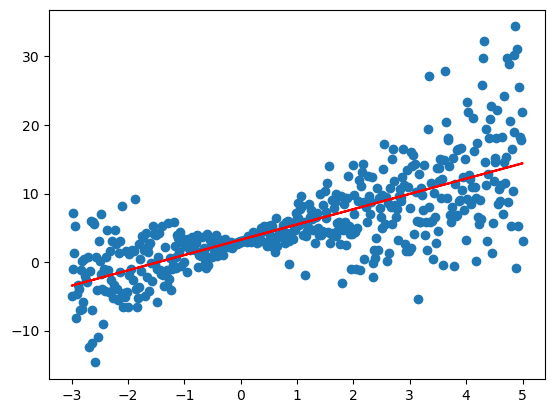

In [81]:
plt.scatter(x, y)
plt.plot(x, predicted, c = "r")
plt.show()

In [83]:
linear_regression.score(x.reshape(-1, 1), y)

0.5335067236009883

In [84]:
r2_score(y, predicted)

0.5335067236009883

In [85]:
mean_squared_error(y, predicted)

23.28333072665978

In [86]:
np.sqrt(mean_squared_error(y, predicted))

4.825280378036056

Date: 20.07.2023